In [1]:
from pydriller import Repository
import pandas as pd
import matplotlib.pyplot as plt
from quarry import _count_lines

In [4]:
path = "https://github.com/mastodon/mastodon.git"

In [34]:
data = {}
#reusing antons commit to dictionary code
counter = 0
for commit in Repository(path).traverse_commits():
    counter = counter + 1
    if(counter%100 == 0):
        print(counter, "/", "12366") #display progress
        #break #for testing
    if(counter > 1000):
        break
    for file in commit.modified_files:
        file_path = file.old_path
        if file_path is None: file_path = file.new_path
        if file_path.startswith("app/services"): #for script use \\
            if data.get(file.filename) is None:
                data[file.filename] = {}
            data[file.filename][commit.hash] = _count_lines(str(file.content))  # nested dictionary

100 / 12366
200 / 12366
300 / 12366
400 / 12366
500 / 12366
600 / 12366
700 / 12366
800 / 12366
900 / 12366
1000 / 12366


In [ ]:
data

In [160]:
df_dict = pd.DataFrame.from_dict(data).T
df_dict = df_dict.T.fillna(method='ffill').T
df_dict = df_dict.fillna(value=0)
df_dict

,9c4856bdb11fc9311ab30a97224cee3dfaec492f,709c6685a90bb819696566cc9e42e587546d72dc,fa7868675d0952f8e4e1aa2f6b77586bb56de2c1,c6b0311b8626b42bc7e79e0195047a50e5b64dd1,1dad72bf13f5e28781a2b2b6654f72624d205576,fa33750105389110a3395ca19167f789d21a149e,10eb47a33e2f0c7f0eba5302319c4321db41294c,44c5958203dd8d0f96f880a8014a3233719077a6,ad5ae3f60e5e0745912bfbc0926f6cf8bc6e9eb4,0e8f59c16fcb21301c736ecbc4424cb4c5388c42,...,afded319d2558369a025b1f3335cebacc9819881,fc90d38893ae81b83884c3f5c85d05d564f1de33,054138797f6f8a9d58ba14c806e8efeed8083abb,93577f74e7ec2edee3a1a208513ae7290211e682,71401659b812b8768fe70aa27221e3319ee1c434,00e9dac1d356e0e3fba757f53c5e5a5a565b904b,b11fdc3ae3f90731c01149a5a36dc64e065d4ea2,7e5e33df48e507e18a226edc8dfecbf554d38647,2488162733df7d940e1cb26e5ece534c1078f4c8,f978b06dd188fef4c2ece5e787818579b663ddf8
fetch_feed_service.rb,6.0,13.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
follow_remote_user_service.rb,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
process_feed_update_service.rb,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
follow_remote_account_service.rb,0.0,43.0,68.0,68.0,59.0,60.0,63.0,68.0,64.0,64.0,...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
follow_service.rb,0.0,11.0,19.0,19.0,11.0,11.0,11.0,11.0,11.0,20.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
process_feed_service.rb,0.0,18.0,88.0,189.0,189.0,189.0,86.0,101.0,107.0,107.0,...,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0
process_interaction_service.rb,0.0,31.0,73.0,73.0,73.0,34.0,71.0,73.0,77.0,77.0,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
setup_local_account_service.rb,0.0,12.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
base_service.rb,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
fetch_entry_service.rb,0.0,0.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [162]:
df_dict = df_dict.reindex((df_dict.mean(axis=1).sort_values(ascending = False).index), axis=0)
df_dict

,9c4856bdb11fc9311ab30a97224cee3dfaec492f,709c6685a90bb819696566cc9e42e587546d72dc,fa7868675d0952f8e4e1aa2f6b77586bb56de2c1,c6b0311b8626b42bc7e79e0195047a50e5b64dd1,1dad72bf13f5e28781a2b2b6654f72624d205576,fa33750105389110a3395ca19167f789d21a149e,10eb47a33e2f0c7f0eba5302319c4321db41294c,44c5958203dd8d0f96f880a8014a3233719077a6,ad5ae3f60e5e0745912bfbc0926f6cf8bc6e9eb4,0e8f59c16fcb21301c736ecbc4424cb4c5388c42,...,afded319d2558369a025b1f3335cebacc9819881,fc90d38893ae81b83884c3f5c85d05d564f1de33,054138797f6f8a9d58ba14c806e8efeed8083abb,93577f74e7ec2edee3a1a208513ae7290211e682,71401659b812b8768fe70aa27221e3319ee1c434,00e9dac1d356e0e3fba757f53c5e5a5a565b904b,b11fdc3ae3f90731c01149a5a36dc64e065d4ea2,7e5e33df48e507e18a226edc8dfecbf554d38647,2488162733df7d940e1cb26e5ece534c1078f4c8,f978b06dd188fef4c2ece5e787818579b663ddf8
process_feed_service.rb,0.0,18.0,88.0,189.0,189.0,189.0,86.0,101.0,107.0,107.0,...,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0
process_interaction_service.rb,0.0,31.0,73.0,73.0,73.0,34.0,71.0,73.0,77.0,77.0,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
follow_remote_account_service.rb,0.0,43.0,68.0,68.0,59.0,60.0,63.0,68.0,64.0,64.0,...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
remove_status_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
follow_remote_user_service.rb,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
follow_service.rb,0.0,11.0,19.0,19.0,11.0,11.0,11.0,11.0,11.0,20.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
fan_out_on_write_service.rb,0.0,0.0,0.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
fetch_atom_service.rb,0.0,0.0,0.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
notify_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,44.0,44.0,42.0,46.0,47.0,51.0,51.0,51.0,51.0
process_mentions_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0


In [163]:
df_dict.columns = range(df_dict.shape[1])

In [196]:
df_dict.shape[0]

33

In [197]:
df_dict.shape[1]

188

In [90]:
import math

In [145]:
df_dict1 = df_dict.head(math.ceil(len(df_dict.index)/2)-7)
df_dict2 = df_dict.tail(math.floor(len(df_dict.index)/2)+7)

In [223]:
def plot_dataframe(dataframe):
    plt.figure(figsize=(20, 12), dpi=80)
    for index, column in dataframe.iterrows():
        plt.plot(column, label=index)

    #plt.setp(plt.axis.get_major_ticks()[::5], visible=False)
    #plt.setp(plt.axes.get_xticklabels(), visible=False)
    #plt.ylim([0, 250])
    #plt.setp(plt.axes.get_xticklabels(), visible=False)
    #plt.setp(plt.axes.get_xticklabels()[::5], visible=True)
    plt.xticks(range(0,188,10))
    #plt.xticks(range(df_dict.shape[1]))
    plt.gca().invert_xaxis()
    plt.legend(loc="upper left")
    plt.savefig("graph_dict_1000_all.pdf")
    plt.show()

TypeError: axis() got an unexpected keyword argument 'scaled'

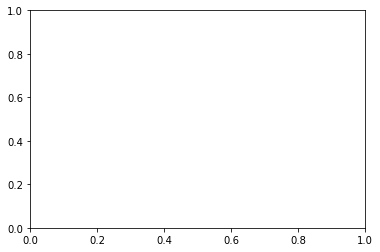

In [204]:
plt.axis(scaled=True)

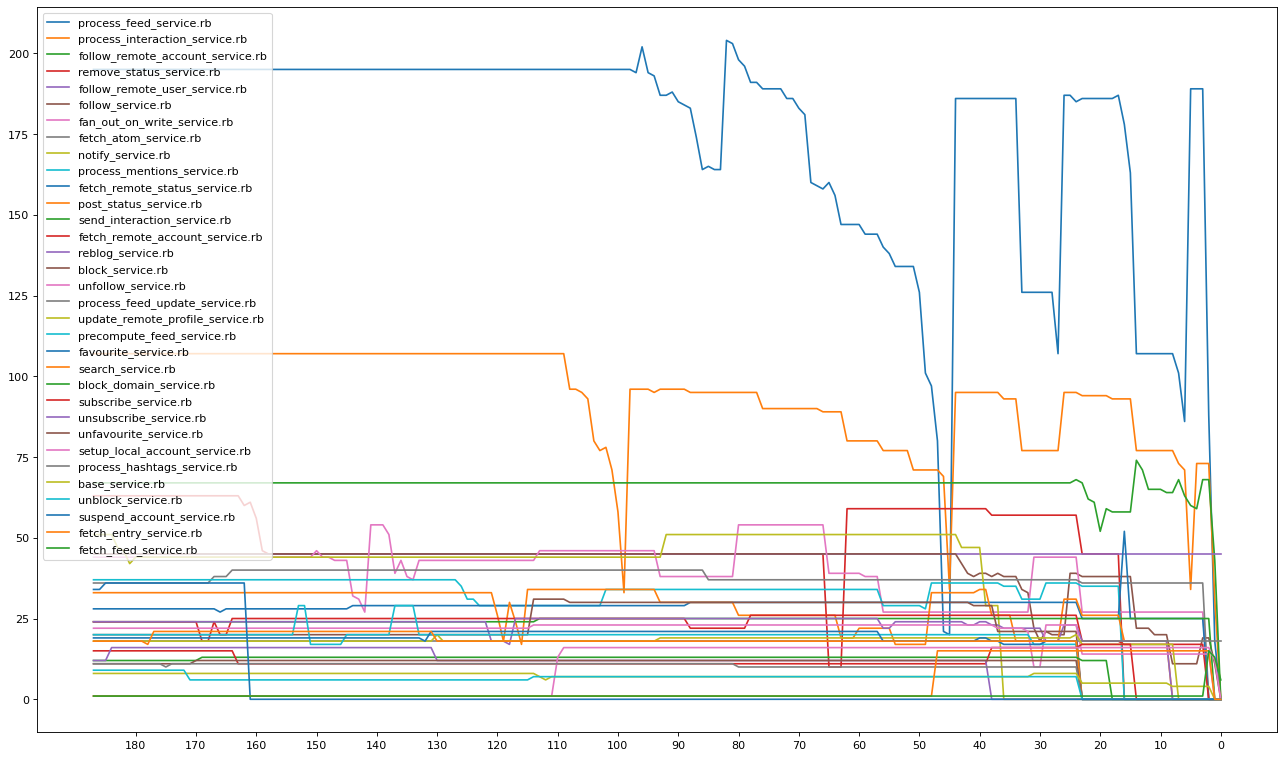

In [224]:
plot_dataframe(df_dict)

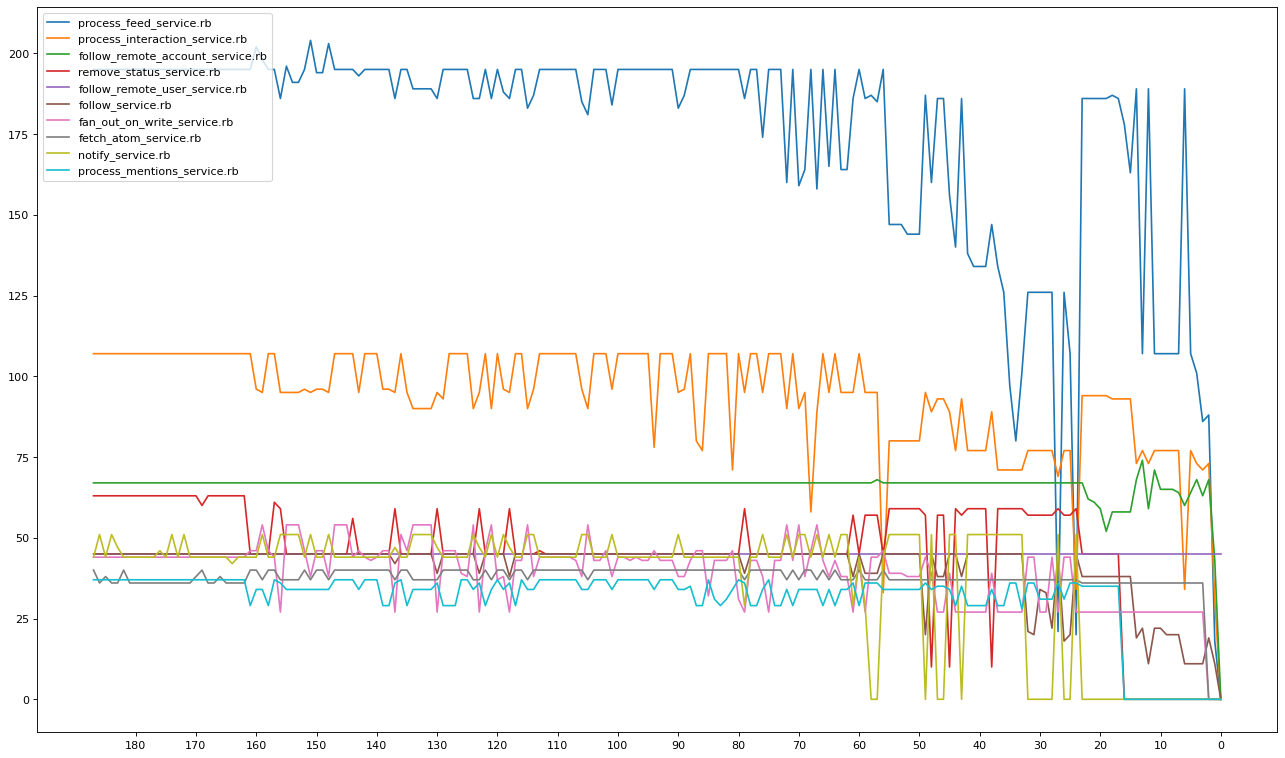

In [220]:
plot_dataframe(df_dict1)

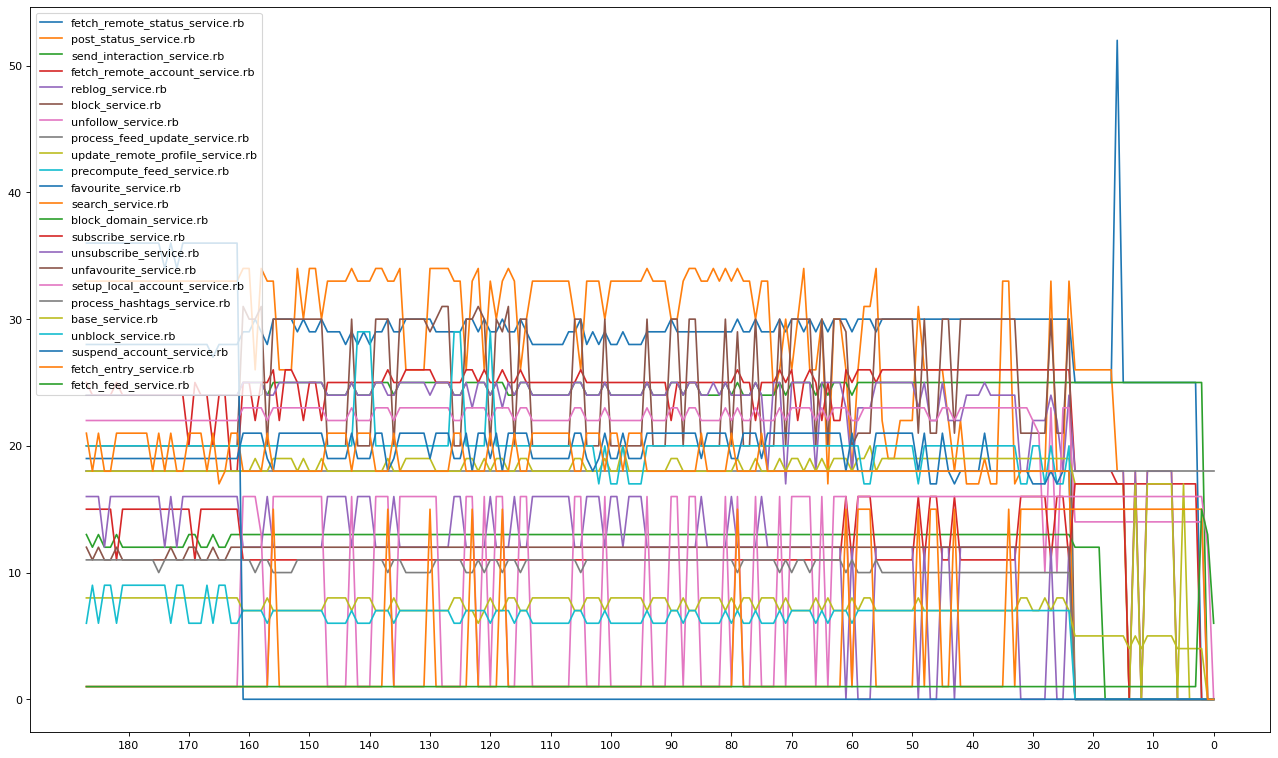

In [222]:
plot_dataframe(df_dict2)